In [1]:
from rmatrix import Particle, ElasticChannel, CaptureChannel, SpinGroup
import numpy as np
import matplotlib.pyplot as plt

# SAMMY Reich-Moore test case

This example compares the calculation in SAMMY tr110 to the calculation by this package

The widths in the SAMMY input (which are given in meV) were divided by the penetrability calculated in this package to convert from the "effective" width used by SAMMY to the true reduced width amplitudes

the RM case is mocked up in this package by creating many gamma channels to excited levels that are very close in energy with the same spins and the same widths?

In [2]:
sammy_answers = np.loadtxt("../tests/files/raa.lst")

In [3]:
neutron = Particle('n',1,0)
gamma = Particle('g',0,0)

target = Particle("20Ne",20,10)
compound = Particle("20Ne", 20,10, Sn=6.6e6)

In [4]:
energies = np.array([1e6,1.1e6])
energy_grid = sammy_answers[:,0]*1e3

In [5]:
J = 0.5
pi = 1  # positive parity
ell = 0  #  s-wave
radius = 0.532   # *10^(-12) cm 

In [6]:
elastic_widths = np.array([1e7,1.1e7])/1e3   # widths from sammy in meV
penetrabilities = np.array([1.11567655, 1.17013143])
elastic_reduced_width_aplitudes = np.sqrt(elastic_widths/(2*penetrabilities))
elastic = ElasticChannel(neutron,target,J,pi,ell,radius,elastic_reduced_width_aplitudes)

In [7]:
# create a bunch of capture channels 20 eV apart
delta_Ex = 20 # eV
capture_channels = []
capture_widths = np.array([1.56212317, 1.62769506])
for i in range(100):
    capture_channels.append(CaptureChannel(
        gamma, compound,J, pi, ell, radius,
        capture_widths,
        i*delta_Ex
    ))

In [8]:
sg = SpinGroup(energies,elastic,capture_channels,energy_grid)

In [9]:
total_capture = np.zeros(energy_grid.shape)
for i in range(1,len(capture_channels)+1):
    total_capture += sg.channels[i].cross_section

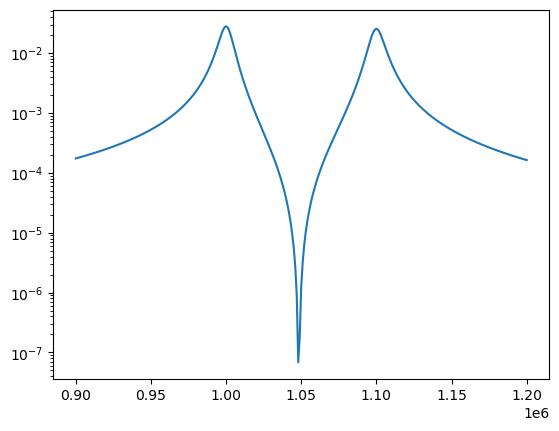

In [11]:
plt.plot(sg.energy_grid, total_capture)
plt.yscale("log")